#스키마 상세 내용
- 1) Age - 사용자의 연령층?
- 2) Gender - 사용자의 성별은?
- 3) spotify_usage_period - Spotify를 사용한 지 얼마나 되었나요?
- 4) spotify_listening_device - 다음 중 Spotify를 청취할 때 주로 사용하는 장치는 무엇입니까?
- 5) spotify_subscription_plan - 현재 어떤 Spotify 구독 계획을 갖고 계시나요?
- 6) premium_sub_willingness - 프리미엄 구독을 하시겠습니까, 아니면 앞으로도 프리미엄 구독을 계속할 의향이 있습니까?
- 7) preffered_premium_plan - 프리미엄이거나 프리미엄을 받을 의향이 있는 경우 구독료로 얼마를 지불합니까?
- 8) preferred_listening_content - 무엇을 더 듣고 싶나요?
- 9) fav_music_genre - 어떤 장르의 음악을 가장 좋아하시나요?
- 10) music_time_slott - 가장 좋아하는 음악 감상 시간은 언제인가요?
- 11) music_Influencial_mood - 음악을 들을 때 다음 중 어떤 기분이나 상황이 음악 선택에 가장 큰 영향을 미치나요?
- 12) music_lis_frequency - 언제 음악을 더 자주 듣나요?
- 13) music_expl_method - Spotify에서 새로운 음악을 어떻게 발견하나요?
- 14) music_recc_rating - Spotify 음악 추천을 어떻게 평가하시나요?
- 15) pod_lis_frequency - 팟캐스트를 얼마나 자주 듣나요?
- 16) fav_pod_genre - 팟캐스트 중 어떤 장르를 가장 좋아하시나요?
- 17) preffered_pod_format - 일반적으로 선호하는 팟캐스트 형식은 무엇입니까?
- 18) pod_host_preference - 알려지지 않은 인물의 팟캐스트를 듣는 것을 더 선호합니까, 아니면 유명인이 호스팅하는 팟캐스트를 선호합니까?
- 19) preffered_pod_duration - 짧은 팟캐스트 에피소드(30분 미만) 또는 긴 에피소드(30분 이상)를 선호합니까?
- 20) pod_variety_satisfaction - Spotify의 팟캐스트의 다양성과 가용성에 만족하시나요?

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
spotify_df = pd.read_csv('/Users/seojeongsig/Documents/GitHub/IS-Realists/Spotify_data.csv')
spotify_df.head(3)

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied


In [5]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          520 non-null    object
 1   Gender                       520 non-null    object
 2   spotify_usage_period         520 non-null    object
 3   spotify_listening_device     520 non-null    object
 4   spotify_subscription_plan    520 non-null    object
 5   premium_sub_willingness      520 non-null    object
 6   preffered_premium_plan       312 non-null    object
 7   preferred_listening_content  520 non-null    object
 8   fav_music_genre              520 non-null    object
 9   music_time_slot              520 non-null    object
 10  music_Influencial_mood       520 non-null    object
 11  music_lis_frequency          520 non-null    object
 12  music_expl_method            520 non-null    object
 13  music_recc_rating            520 no

In [ ]:
# 'fav_pod_genre - 어떤 장르를 선호하는지', 'preffered_pod_format - 선호하는 팟캐스트 형식'
# 'pod_host_preference  - 유명 or 마이너 팟캐스트 선호 여부', 'preffered_pod_duration - 짧은 or 긴 시간 팟캐스트 선호 여부' 결측치 있음
spotify_df.isnull().sum()

In [22]:
# 프리미엄 구독 의향 'Yes'인 값 중 'preffered_premium_plan' NaN값 5row 있음
#null 값이 아닌 NaN값으로 데이터 집계가 잘못된 것으로 판단됨
spotify_df.loc[(spotify_df['premium_sub_willingness'] == 'Yes') & (spotify_df['preffered_premium_plan'].isnull())]

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
14,20-35,Female,More than 2 years,Smartphone,Free (ad-supported),Yes,NaN,Music,Pop,Morning,Relaxation and stress relief,Office hours,"recommendations, Playlists",5,Rarely,Lifestyle and Health,Educational,Well known individuals,Shorter,Very Satisfied
33,12-20,Male,More than 2 years,Smartphone,Free (ad-supported),Yes,NaN,Music,Pop,Night,Relaxation and stress relief,While Traveling,recommendations,3,Rarely,Comedy,Conversational,Both,Both,Ok
60,20-35,Male,More than 2 years,Smartphone,Free (ad-supported),Yes,NaN,Music,classical,Night,"Relaxation and stress relief, Uplifting and mo...","While Traveling, leisure time",recommendations,4,Rarely,Sports,Conversational,Well known individuals,Both,Satisfied
203,20-35,Female,Less than 6 months,Smartphone,Premium (paid subscription),Yes,NaN,Music,Melody,Night,"Relaxation and stress relief, Sadness or melan...",While Traveling,"recommendations, Playlists",5,Rarely,Comedy,Conversational,Well known individuals,Shorter,Satisfied
346,20-35,Female,More than 2 years,Smartphone,Free (ad-supported),Yes,NaN,Music,Melody,Night,Relaxation and stress relief,While Traveling,recommendations,3,Rarely,Comedy,Conversational,Both,Shorter,Ok


In [33]:
# PK인 ID가 없어 Index로 ID부여, ID는 1부터 시작
spotify_df['ID'] = spotify_df.index+1

In [46]:
a = spotify_df.groupby('Gender')['ID'].count()
a

Gender
Female    391
Male      114
Others     15
Name: ID, dtype: int64

<Axes: xlabel='Age', ylabel='count'>

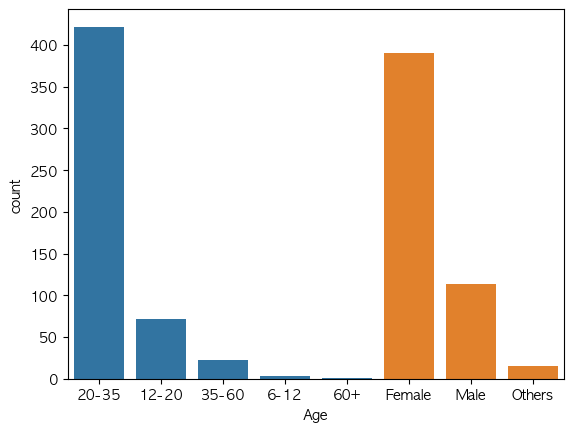

In [48]:
#주 사용자 20-35세 여성
#Gender에 Ohers 값 존재
plt.rcParams['font.family'] = 'AppleGothic'
sns.countplot(x='Age', data=spotify_df)
sns.countplot(x='Gender', data=spotify_df)

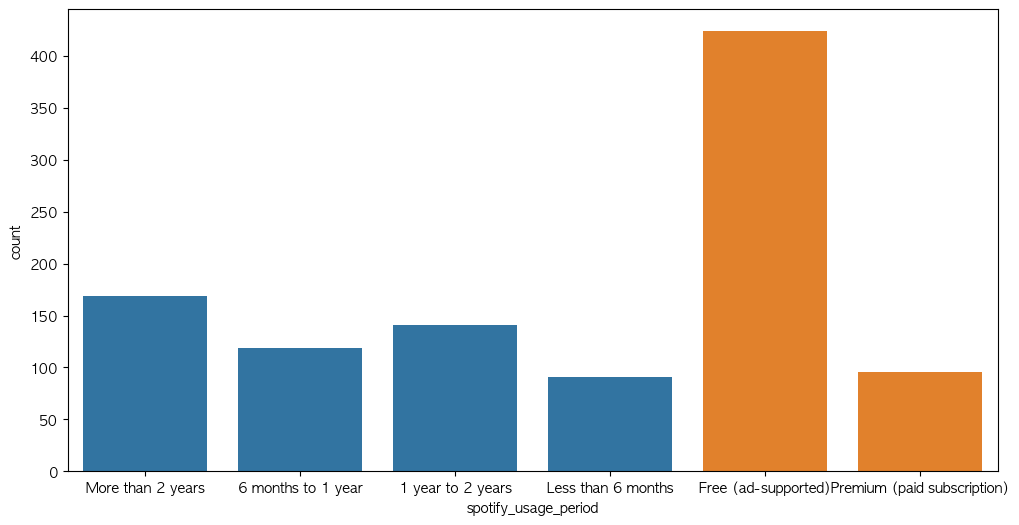

In [77]:
# 2년 이상, 1년이상 2년 미만 사용자 다수
# 6개월 이하 사용자 가장 적음
# 약 80%사용자가 무료 광고형 요금제 사용, 20% 수준이 프리미엄 요금제 사용
plt.figure(figsize=(12, 6))

sns.countplot(x='spotify_usage_period', data=spotify_df)
sns.countplot(x='spotify_subscription_plan', data=spotify_df)
plt.show()

In [64]:
# 대부분의 사용자가 smartphone 단일 기기 이용
spotify_df.groupby('spotify_listening_device')['ID'].count()

spotify_listening_device
Computer or laptop                                                                       54
Computer or laptop, Smart speakers or voice assistants                                   14
Computer or laptop, Smart speakers or voice assistants, Wearable devices                  3
Computer or laptop, Wearable devices                                                      5
Smart speakers or voice assistants                                                       43
Smart speakers or voice assistants, Wearable devices                                      2
Smartphone                                                                              300
Smartphone, Computer or laptop                                                           48
Smartphone, Computer or laptop, Smart speakers or voice assistants                        7
Smartphone, Computer or laptop, Smart speakers or voice assistants, Wearable devices      8
Smartphone, Computer or laptop, Wearable devices       

<Axes: xlabel='spotify_subscription_plan', ylabel='count'>

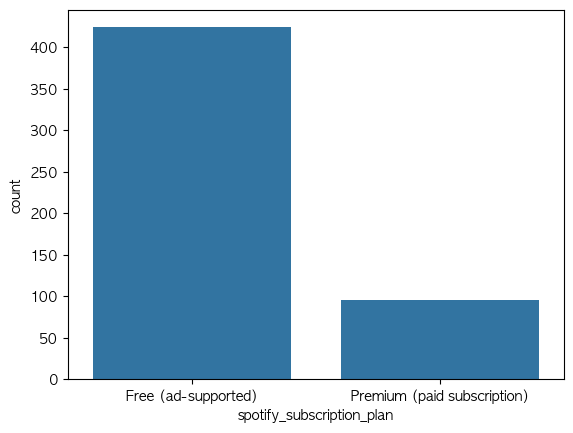

In [65]:
sns.countplot(x='spotify_subscription_plan', data=spotify_df)
